In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns


In [15]:
import os
import glob

from pandas.api.types import CategoricalDtype

HOME = "/home/kwatchar3/spauq-home/spauq/expt/codec/musdb/results-2s/aac"

results = glob.glob(os.path.join(HOME, "aac*.csv"))

dfs = []

for r in results:
    model_name = r.split("/")[-1].replace(".csv", "")
    # print(model_name)
    codec, bitrate, mode = model_name.split("-")
    df = pd.read_csv(r).rename(columns={'Unnamed: 0': 'title', 'Unnamed: 1': 'instrument'})
    df['codec'] = codec
    df['bitrate'] = int(bitrate)
    df['mode'] = mode
    df['mode'] = + df['mode'].apply(
        lambda x: {
            'joint0': 'no joint coding',
            'joint1': 'mid/side stereo',
            'joint2': 'intensity stereo',
        }[x]
    )
    dfs.append(df)
    
modetype = CategoricalDtype(['no joint coding', 'mid/side stereo', 'intensity stereo'], ordered=True)

    
df = pd.concat(dfs).reset_index().drop(columns='index').sort_values(['bitrate', 'mode'])
df['mode'] = df['mode'].astype(modetype)

df

,title,instrument,SSR,SRR,cost,shift,scale,codec,bitrate,mode
1650,AM Contra - Heart Peripheral,mixture,17.141875,8.379952,16.196832,"[[0.0, 0.0], [0.0, 0.0]]","[[0.7849157011558026, 0.11710136880284233], [0...",aac,32,intensity stereo
1651,Al James - Schoolboy Facination,mixture,15.134412,5.611041,20.376248,"[[0.0, 0.0], [0.0, 0.0]]","[[0.7637861686476692, 0.09073347158254785], [0...",aac,32,intensity stereo
1652,Angels In Amplifiers - I'm Alright,mixture,17.754350,6.869829,20.219657,"[[0.0, 0.0], [0.0, 0.0]]","[[0.8430330801152549, 0.050781365914263084], [...",aac,32,intensity stereo
1653,Arise - Run Run Run,mixture,28.137252,15.154762,10.855361,"[[0.0, 0.0], [0.0, 0.0]]","[[0.9460655447767273, 0.017377057730388428], [...",aac,32,intensity stereo
1654,BKS - Bulldozer,mixture,18.707055,7.961051,15.911072,"[[0.0, 0.0], [0.0, 0.0]]","[[0.8527446006601577, 0.060414887284626004], [...",aac,32,intensity stereo
...,...,...,...,...,...,...,...,...,...,...
1895,Timboz - Pony,mixture,50.393864,35.613498,0.821030,"[[0.0, 0.0], [0.0, 0.0]]","[[0.9968357897099106, 0.00041558648762387906],...",aac,320,no joint coding
1896,Tom McKenzie - Directions,mixture,56.670671,38.349447,0.595830,"[[0.0, 0.0], [0.0, 0.0]]","[[0.9978107894270086, 0.0009886335157228067], ...",aac,320,no joint coding
1897,Triviul feat. The Fiend - Widow,mixture,48.006985,29.714010,1.419619,"[[0.0, 0.0], [0.0, 0.0]]","[[0.9953943418216628, 0.0006188442150890857], ...",aac,320,no joint coding
1898,We Fell From The Sky - Not You,mixture,52.464607,37.781303,0.601129,"[[0.0, 0.0], [0.0, 0.0]]","[[0.9974292501834604, 0.00032954596621984436],...",aac,320,no joint coding


In [40]:
def plot(brrange=[0, np.inf], ssr_step=25, srr_step=10):
    sns.set("paper", "whitegrid", "colorblind", font_scale=1.5)
    
    bf = (df['bitrate'] >= brrange[0]) & (df['bitrate'] <= brrange[1]) 

    f, ax = plt.subplots(2, 1, figsize=(8, 4), tight_layout=True, dpi=300)
    kwargs = dict(showfliers=True, notch=True, fliersize=1, flierprops={"marker": "x"}, width=0.9)
    sns.boxplot(df[bf], y='SSR', hue='mode', x='bitrate', ax=ax[0], **kwargs)
    sns.boxplot(df[bf], y='SRR', hue='mode', x='bitrate', ax=ax[1], **kwargs)
    
    
    ssr_min, ssr_max = df[bf]['SSR'].quantile(0.02), df[bf]['SSR'].max()
    ssr_min, ssr_max = np.floor(ssr_min/ssr_step)*ssr_step, np.ceil(ssr_max/ssr_step)*ssr_step
    ssr_minor_step = 1 if ssr_step <= 5 else 5
    
    srr_min, srr_max = df[bf]['SRR'].quantile(0.02), df[bf]['SRR'].max()
    srr_min, srr_max = np.floor(srr_min/srr_step)*srr_step, np.ceil(srr_max/srr_step)*srr_step
    srr_minor_step = 1 if srr_step <= 5 else 5

    ax[0].set_yticks(np.arange(ssr_min, ssr_max+1, ssr_step))
    ax[0].set_yticks(np.arange(ssr_min, ssr_max, ssr_minor_step), minor=True)
    ax[1].set_yticks(np.arange(srr_min, srr_max+1, srr_step))
    ax[1].set_yticks(np.arange(srr_min, srr_max, srr_minor_step), minor=True)
    ax[0].set(ylim=[ssr_min, ssr_max], ylabel='SSR (dB)')
    ax[1].set(ylim=[srr_min, srr_max], ylabel='SRR (dB)')

    for a in ax:
        a.grid(True, axis='y', which='minor')
        a.tick_params(axis='both', which='minor')
        a.set(xlabel=None)
        a.legend().remove()

    plt.tight_layout()
    plt.xlabel('average bitrate (Kbps)')
    f.align_ylabels(ax)
    f.subplots_adjust(wspace=0, hspace=0.25)

    h, l = ax[0].get_legend_handles_labels()
    f.legend(h, l, loc='upper left', fontsize=10, ncols=3, bbox_to_anchor=(0.1, 0.95))#, fontsize=10)


    ax[1].set(xticklabels=[])
    
    return ax


In [17]:
# df2 = df.set_index(['bitrate', 'mode'])

df3 = df[df['mode'] == "no joint coding"].set_index(['title', 'instrument', 'bitrate', 'mode'])

In [18]:
df['SSR0'] = df.apply(lambda x: df3.loc[(x.title, x.instrument, x.bitrate, 'no joint coding'), 'SSR'], axis=1)
df['SRR0'] = df.apply(lambda x: df3.loc[(x.title, x.instrument, x.bitrate, 'no joint coding'), 'SRR'], axis=1)

In [19]:
df['dSSR'] = df['SSR'] - df['SSR0']
df['dSRR'] = df['SRR'] - df['SRR0']

In [32]:
def plot2(brrange=[0, np.inf], ssr_step=25, srr_step=10):
    sns.set("paper", "whitegrid", "colorblind", font_scale=1.5)
    
    # df = df.copy()
    df2 = df[~(df['mode'] == "no joint coding")].reset_index()
    
    bf = (df2['bitrate'] >= brrange[0]) & (df2['bitrate'] <= brrange[1]) 

    f, ax = plt.subplots(2, 1, figsize=(8, 4), tight_layout=True, dpi=300)
    kwargs = dict(showfliers=True, notch=True, fliersize=1, flierprops={"marker": "x"}, width=0.9)
    sns.boxplot(df2[bf], y='dSSR', hue='mode', x='bitrate', ax=ax[0], **kwargs)
    sns.boxplot(df2[bf], y='dSRR', hue='mode', x='bitrate', ax=ax[1], **kwargs)
    
    
    ssr_min, ssr_max = df2[bf]['dSSR'].quantile(0.001), df2[bf]['dSSR'].quantile(0.95)
    ssr_min, ssr_max = np.floor(ssr_min/ssr_step)*ssr_step, np.ceil(ssr_max/ssr_step)*ssr_step
    ssr_minor_step = 1 if ssr_step <= 5 else 5
    
    srr_min, srr_max = df2[bf]['dSRR'].quantile(0.0), df2[bf]['dSRR'].quantile(0.95)
    srr_min, srr_max = np.floor(srr_min/srr_step)*srr_step, np.ceil(srr_max/srr_step)*srr_step
    srr_minor_step = 1 if srr_step <= 5 else 5

    ax[0].set_yticks(np.arange(ssr_min, ssr_max+1, ssr_step))
    ax[0].set_yticks(np.arange(ssr_min, ssr_max, ssr_minor_step), minor=True)
    ax[1].set_yticks(np.arange(srr_min, srr_max+1, srr_step))
    ax[1].set_yticks(np.arange(srr_min, srr_max, srr_minor_step), minor=True)
    ax[0].set(ylim=[-12.5, ssr_max], ylabel='ΔSSR (dB)')
    ax[1].set(ylim=[srr_min, srr_max], ylabel='ΔSRR (dB)')

    for a in ax:
        a.grid(True, axis='y', which='minor')
        a.tick_params(axis='both', which='minor')
        a.set(xlabel=None)
        a.legend().remove()
        a.axhline(0, linestyle=':', zorder=1)

    plt.tight_layout()
    plt.xlabel('average bitrate (Kbps)')
    f.align_ylabels(ax)
    f.subplots_adjust(wspace=0, hspace=0.25)

    h, l = ax[0].get_legend_handles_labels()
    f.legend(h[1:], l[1:], loc='upper center', fontsize=10, ncols=3, bbox_to_anchor=(0.55, 0.96))#, fontsize=10)

    
    ax[1].set(xticklabels=[])
    
    return ax


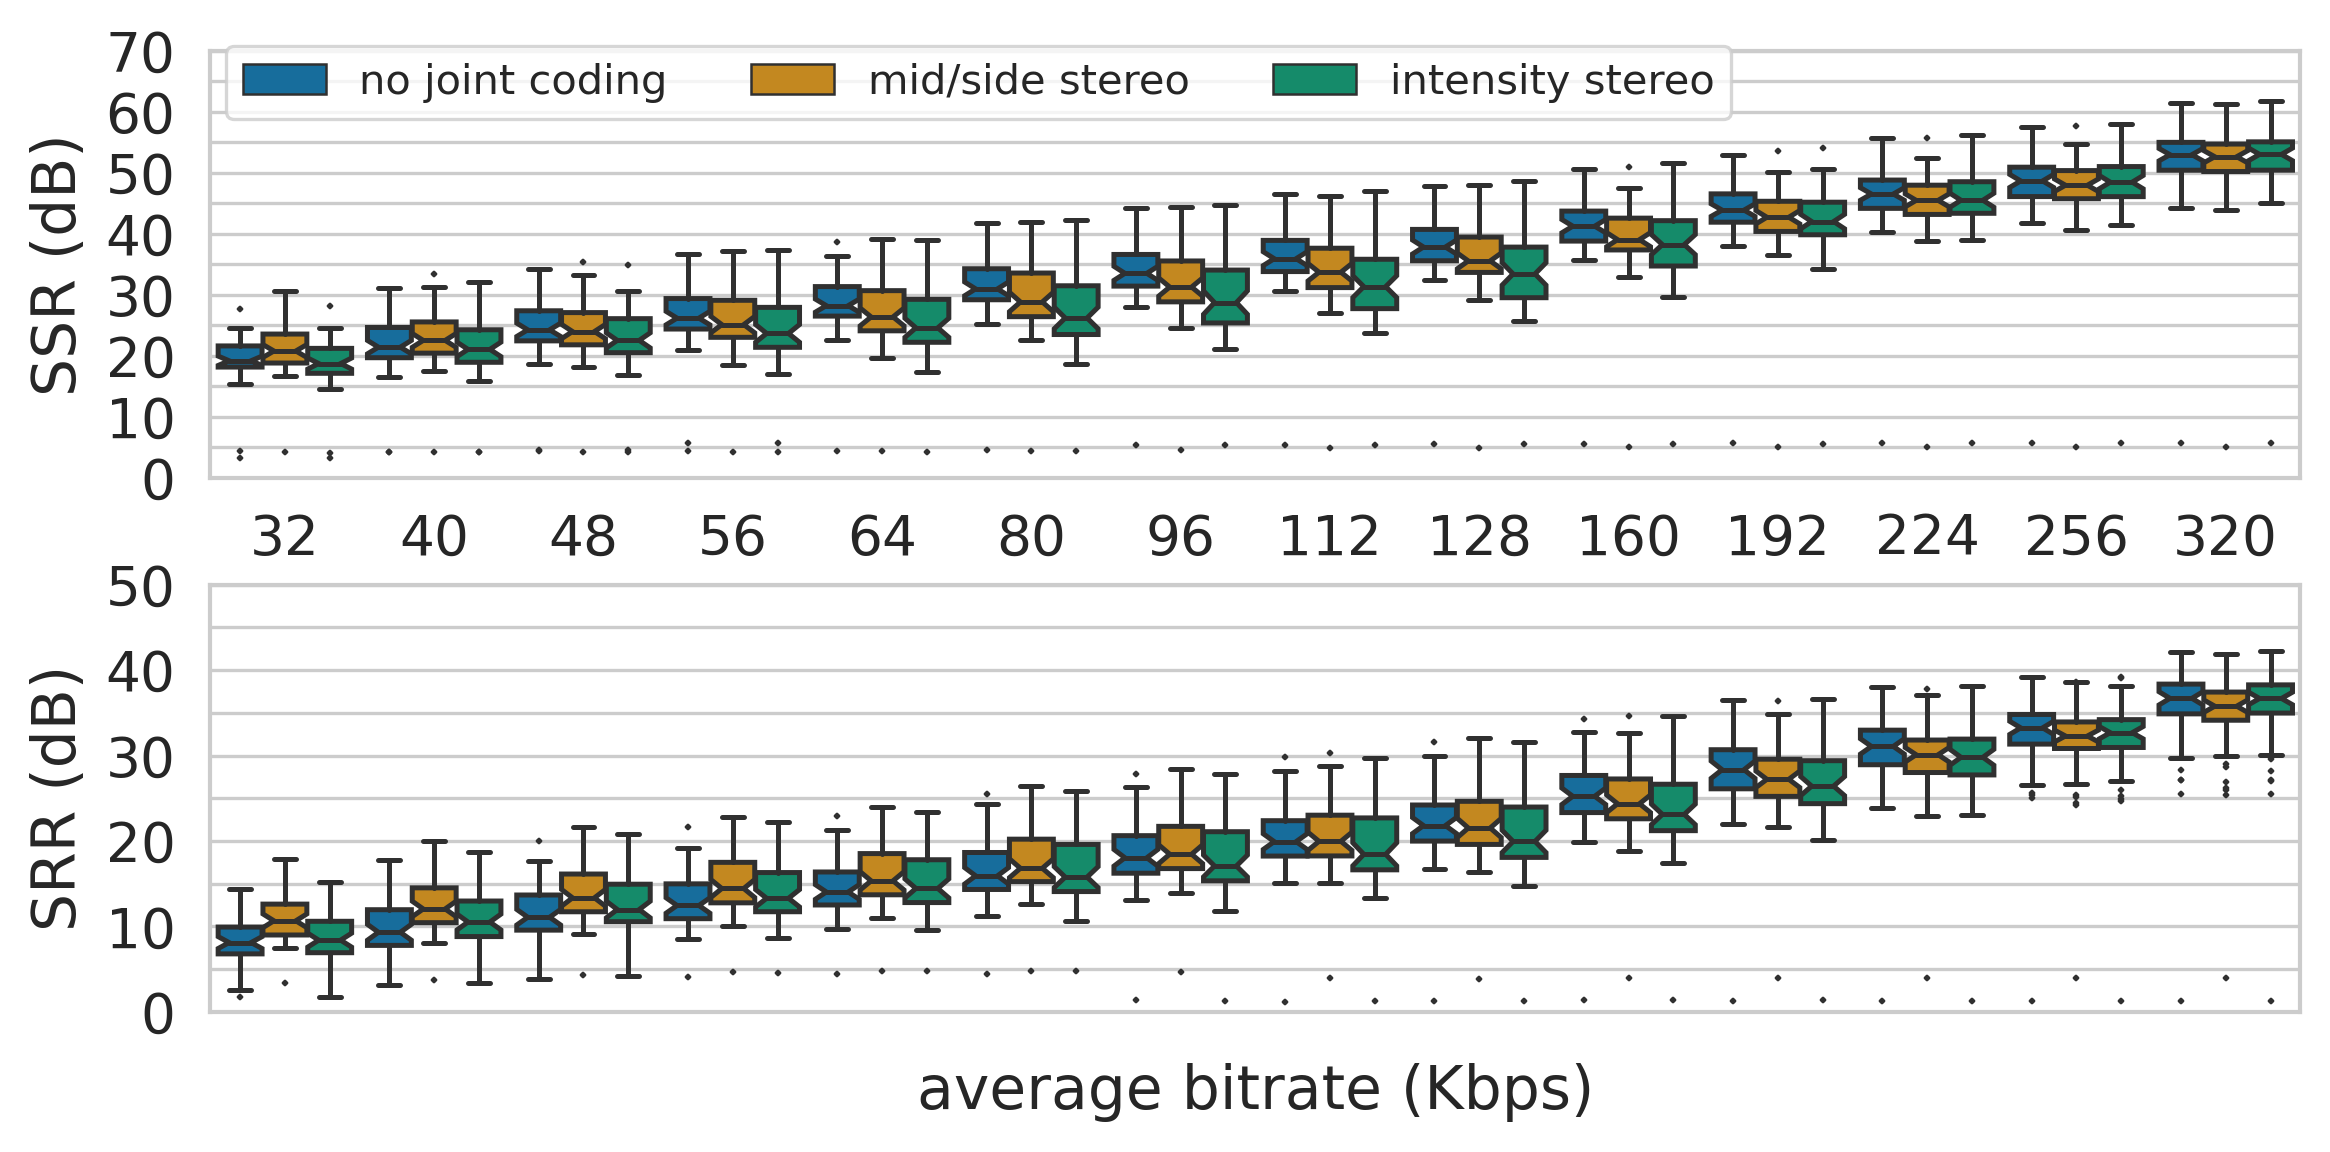

In [43]:
plot(ssr_step=10)
# plt.gcf().set_size_inches(6, 4)
plt.savefig("aac-musdb.pdf", bbox_inches='tight')
plt.show()

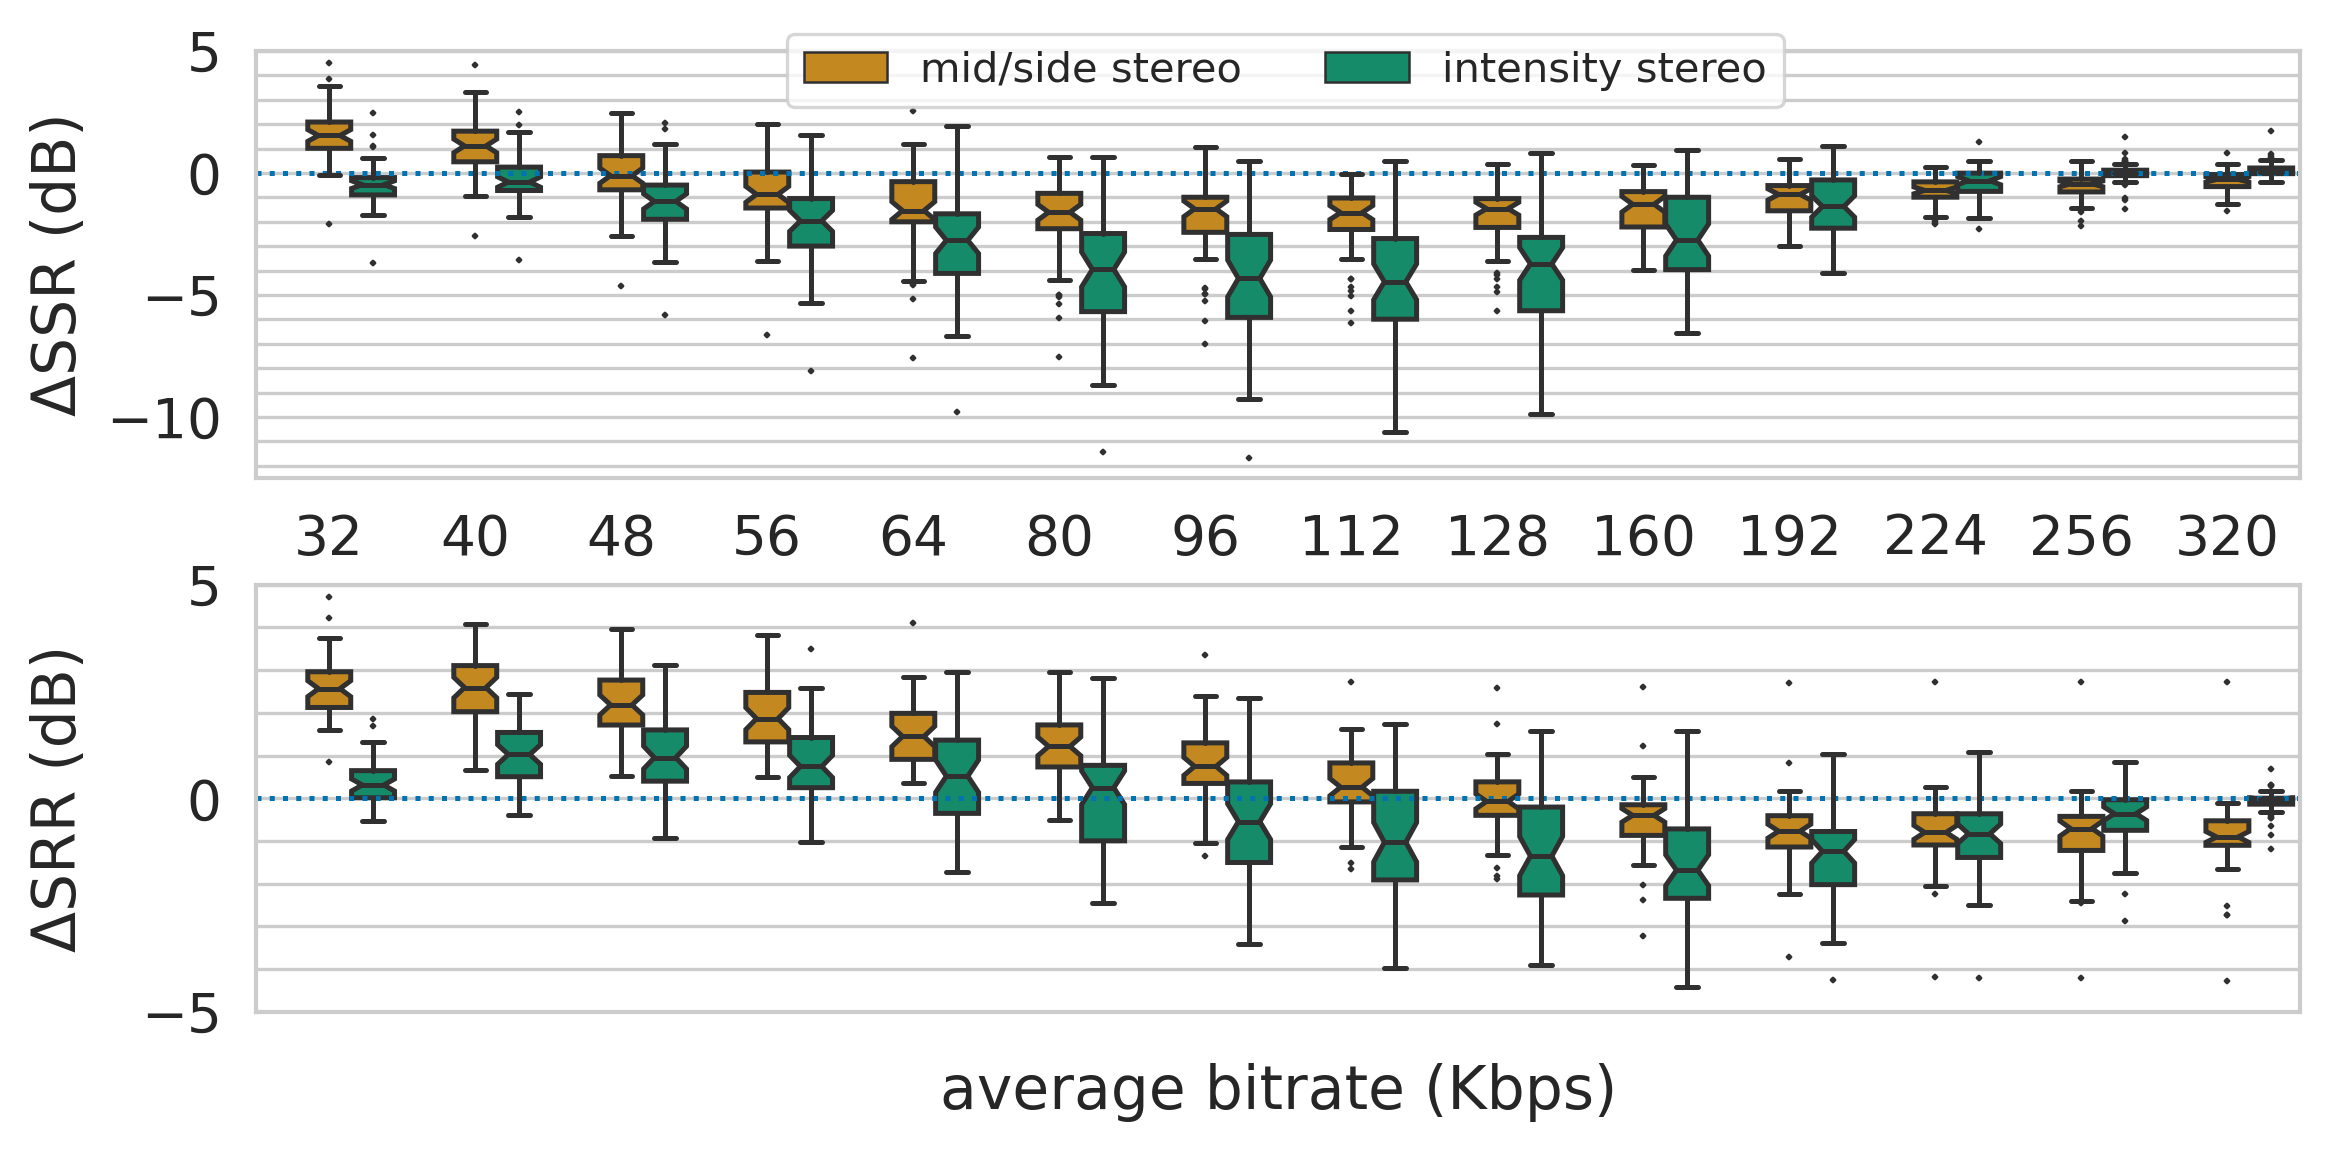

In [42]:
plot2(ssr_step=5, srr_step=5)
plt.savefig("aac-musdb2.pdf", bbox_inches='tight')
plt.show()